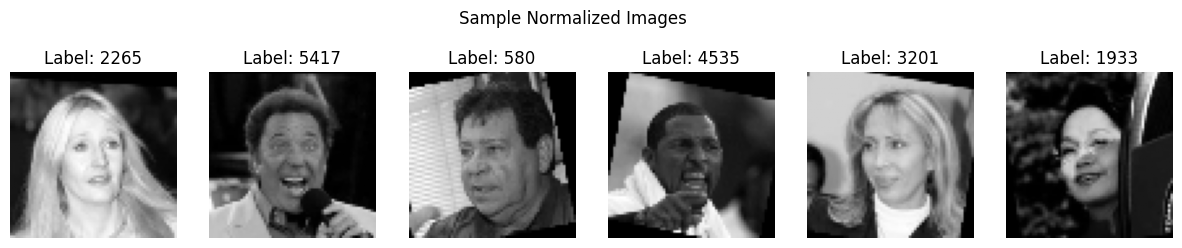

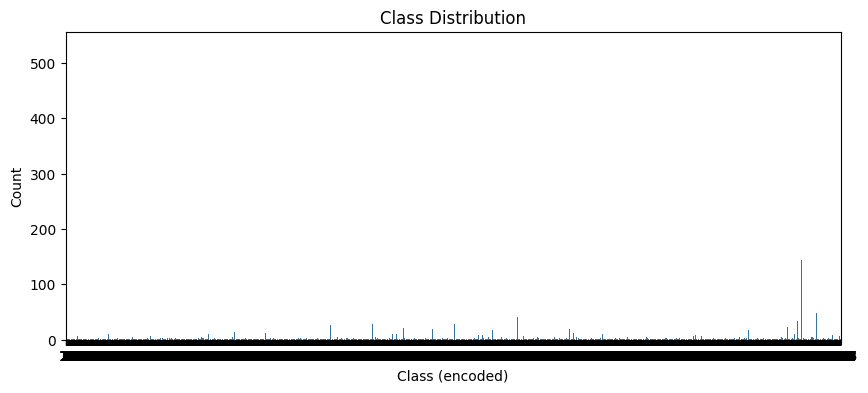

In [1]:
# exploration.py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from preprocessing import load_lfw_funneled_data, clean_and_resize_images, normalize_images

# Set the path to your extracted data.
data_dir = r"data"
images, numeric_labels, le = load_lfw_funneled_data(data_dir)
cleaned_images = clean_and_resize_images(images, target_size=(64, 64))
normalized_images = normalize_images(cleaned_images)
if normalized_images.ndim == 3:
    normalized_images = normalized_images[..., None]

# Visualize a set of random sample images.
sample_indices = np.random.choice(range(normalized_images.shape[0]), 6, replace=False)
fig, axes = plt.subplots(1, 6, figsize=(15, 3))
for i, idx in enumerate(sample_indices):
    axes[i].imshow(normalized_images[idx].squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {numeric_labels[idx]}")
    axes[i].axis("off")
plt.suptitle("Sample Normalized Images")
plt.show()

# Plot class distribution.
df = pd.DataFrame({'label': numeric_labels})
plt.figure(figsize=(10, 4))
sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.xlabel("Class (encoded)")
plt.ylabel("Count")
plt.show()


Loaded 13233 images from 5749 persons.


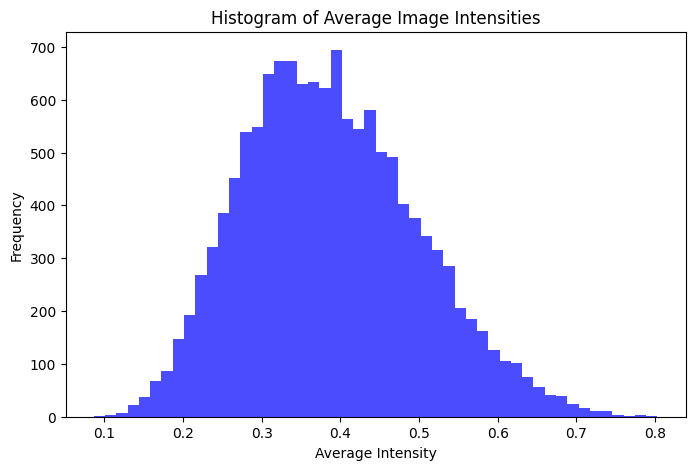

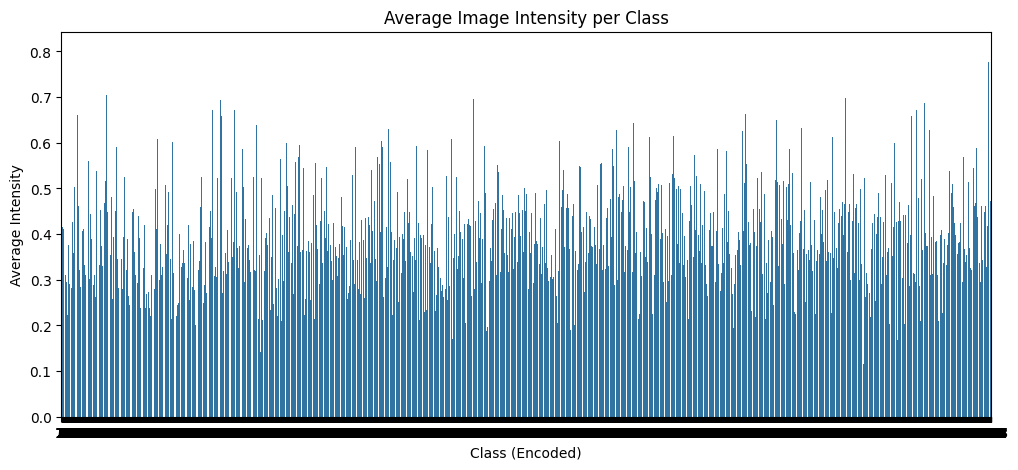

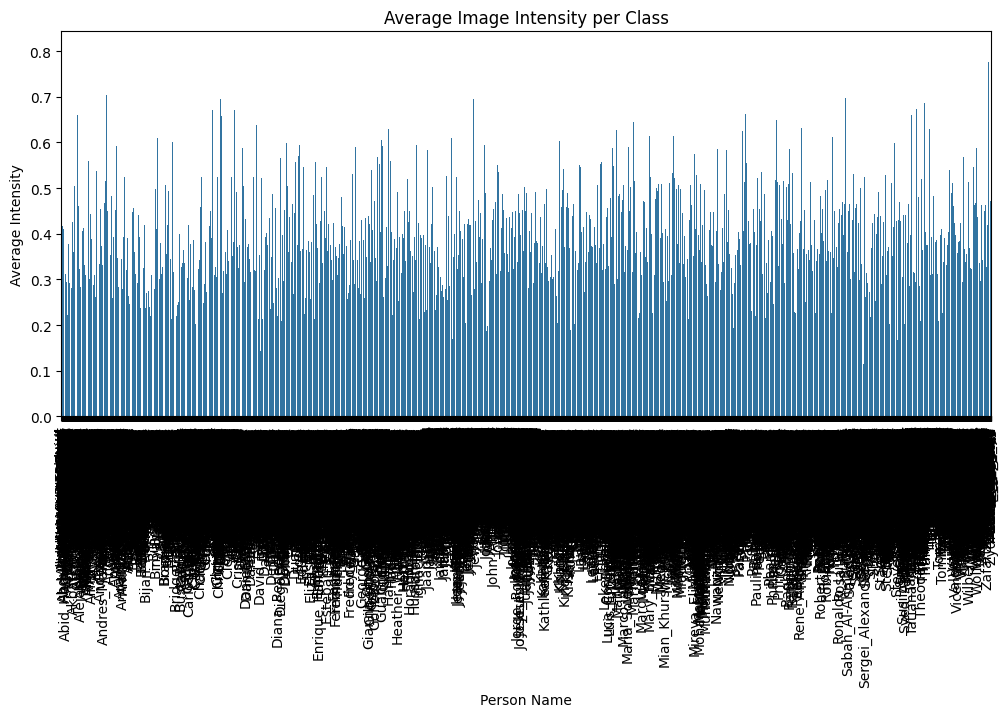

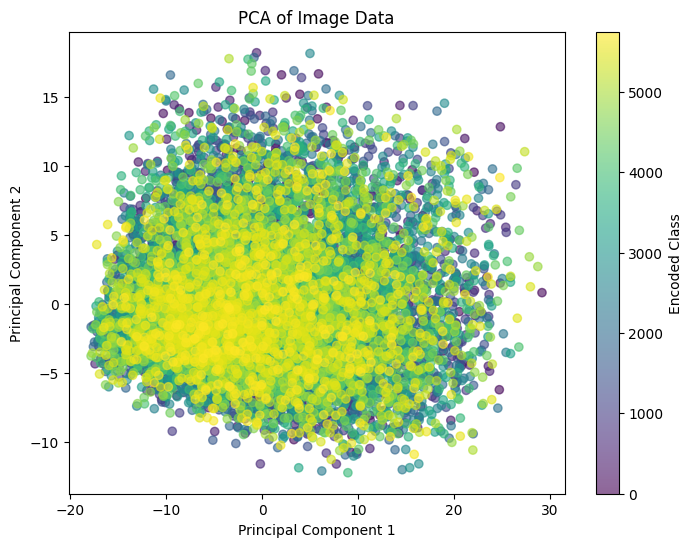

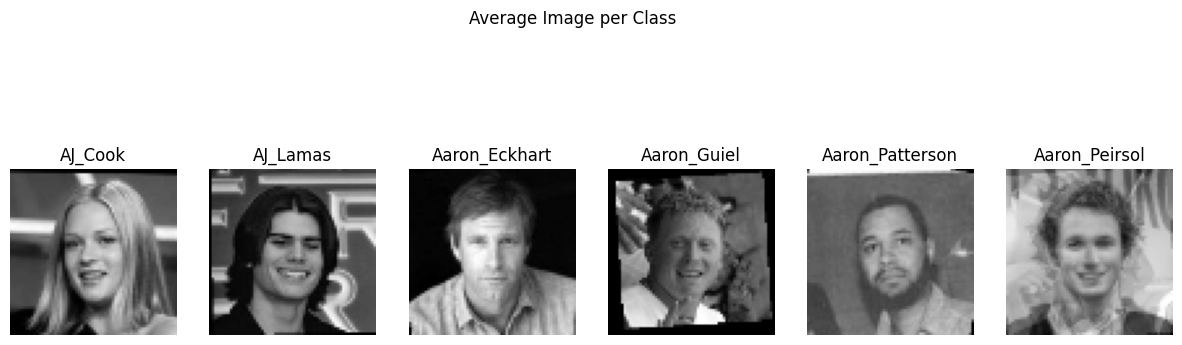

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from preprocessing import load_lfw_funneled_data, clean_and_resize_images, normalize_images  # Assumes preprocessing.py is in the same directory

# --- Load and Process Data ---
# Use the extracted dataset in the "data" folder
data_dir = r"data"
images, numeric_labels, le = load_lfw_funneled_data(data_dir)
print(f"Loaded {images.shape[0]} images from {len(le.classes_)} persons.")

cleaned_images = clean_and_resize_images(images, target_size=(64, 64))
normalized_images = normalize_images(cleaned_images)

# If images are grayscale and still 3D (N, height, width), add a channel dimension.
if normalized_images.ndim == 3:
    normalized_images = normalized_images[..., np.newaxis]

# --- Histogram of Average Image Intensities ---
# Flatten images to compute average brightness per image.
flat_images = normalized_images.reshape(normalized_images.shape[0], -1)
avg_intensity = np.mean(flat_images, axis=1)

plt.figure(figsize=(8, 5))
plt.hist(avg_intensity, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Average Image Intensities")
plt.xlabel("Average Intensity")
plt.ylabel("Frequency")
plt.show()

# --- Class-Level Intensity Analysis ---
# Create a DataFrame for easier analysis.
df = pd.DataFrame({
    'label': numeric_labels,
    'avg_intensity': avg_intensity
})
class_avg_intensity = df.groupby('label').mean().reset_index()

# Plot average intensity for each class.
plt.figure(figsize=(12, 5))
sns.barplot(x=class_avg_intensity['label'], y=class_avg_intensity['avg_intensity'])
plt.title("Average Image Intensity per Class")
plt.xlabel("Class (Encoded)")
plt.ylabel("Average Intensity")
plt.show()

# Optionally, map numeric labels back to the names:
class_names = [le.inverse_transform([i])[0] for i in class_avg_intensity['label']]
plt.figure(figsize=(12, 5))
sns.barplot(x=class_names, y=class_avg_intensity['avg_intensity'])
plt.title("Average Image Intensity per Class")
plt.xlabel("Person Name")
plt.ylabel("Average Intensity")
plt.xticks(rotation=90)
plt.show()

# --- PCA Visualization ---
# Flatten each image for PCA (each image becomes a vector).
X_flat = normalized_images.reshape(normalized_images.shape[0], -1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=numeric_labels, cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Encoded Class')
plt.title("PCA of Image Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# --- Average Image per Class ---
# Compute and display the average image for a few classes.
unique_labels = np.unique(numeric_labels)
n_display = min(6, len(unique_labels))  # Display up to 6 classes
plt.figure(figsize=(15, 5))
for i, label in enumerate(unique_labels[:n_display]):
    # Select images for this label.
    class_images = normalized_images[numeric_labels == label]
    avg_image = np.mean(class_images, axis=0)
    plt.subplot(1, n_display, i + 1)
    plt.imshow(avg_image.squeeze(), cmap='gray')
    plt.title(le.inverse_transform([label])[0])
    plt.axis("off")
plt.suptitle("Average Image per Class")
plt.show()
